In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
print(tf.__version__)

2.4.1


In [4]:
import os
for dirname, _, filenames in os.walk('titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

titanic/xs_imp.pkl
titanic/gender_submission.csv
titanic/submission_nn.csv
titanic/train.csv
titanic/test.csv
titanic/submission_nn_wd.csv
titanic/submission_rf.csv
titanic/titanic.zip
titanic/submission.csv
titanic/valid_xs_imp.pkl
titanic/.~lock.submission_dl.csv#
titanic/submission_nn_moms.csv


# Load the data

In [5]:
train_data = pd.read_csv("titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data = pd.read_csv("titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Explore a pattern

In [7]:
women = train_data.loc[train_data.Sex == 'female']['Survived']

rate_women = sum(women)/len(women)
rate_women

0.7420382165605095

In [8]:
# women survived
sum(women)

233

In [9]:
# total women
len(women)

314

In [10]:
x = train_data.loc[train_data.Sex == 'female']['Fare']
sum(x)/len(x)

44.47981783439487

In [11]:
y = train_data.loc[train_data.Sex == 'male']['Fare']
sum(y)/len(y)

25.523893414211418

In [12]:
xx = train_data.loc[train_data.Sex == 'female']['Pclass']
xy = train_data.loc[train_data.Sex == 'male']['Pclass']

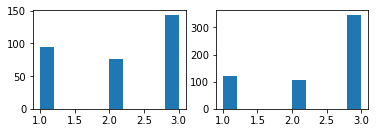

In [13]:
plt.figure()
plt.subplot(221)
plt.hist(xx)
plt.subplot(222)
plt.hist(xy)
plt.show()

In [14]:
men = train_data.loc[train_data.Sex == 'male']['Survived']

rate_men = sum(men)/len(men)
rate_men

0.18890814558058924

In [15]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Clean the data

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train_data_features = train_data.copy()

In [19]:
train_data_labels = train_data_features.pop('Survived')

In [20]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
train_data_features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## start set title

In [22]:
def set_title(df):
    return df.Name.map(lambda x: x.split(',')[1].split('.')[0].strip())

In [23]:
train_data_features['Title'] = set_title(train_data_features)

In [24]:
train_data_features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [25]:
test_data['Title'] = set_title(test_data)

In [26]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [27]:
# train_data_features['Title'] = train_data_features.Name.map(lambda x: x.split(',')[1].split('.')[0].strip())

In [28]:
train_data_features.pop('Name');
train_data_features.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [29]:
test_data.pop('Name');
test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

## start set cabin

In [30]:
def set_cabin(df):
    df.Cabin.fillna('Z', inplace=True)
    df.Cabin = df.Cabin.str[0]
    return df

In [31]:
train_data_features.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [32]:
train_data_features = set_cabin(train_data_features)

In [33]:
train_data_features

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,Z,S,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,Z,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,211536,13.0000,Z,S,Rev
887,888,1,female,19.0,0,0,112053,30.0000,B,S,Miss
888,889,3,female,NaN,1,2,W./C. 6607,23.4500,Z,S,Miss
889,890,1,male,26.0,0,0,111369,30.0000,C,C,Mr


In [34]:
test_data = set_cabin(test_data)

In [35]:
test_data.Cabin.unique()

array(['Z', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

## start drop some columns

In [36]:
train_data_features.pop('Ticket')

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [37]:
# train_data_features.pop('Age')

In [38]:
test_data.pop('Ticket')

0                  330911
1                  363272
2                  240276
3                  315154
4                 3101298
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 418, dtype: object

In [39]:
# test_data.pop('Age')

## start set embarked

In [40]:
train_data_features.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         2
Title            0
dtype: int64

In [41]:
train_data_features.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [42]:
# (train_data_features.Embarked == 'S').sum()

In [43]:
# (train_data_features.Embarked == 'C').sum()

In [44]:
# (train_data_features.Embarked == 'Q').sum()

In [45]:
def set_embarked(df):
    maxval = df.Embarked.value_counts().idxmax()
    return df.Embarked.fillna(maxval, inplace=True)

In [46]:
# train_data_features.Embarked.value_counts().idxmax()

In [47]:
set_embarked(train_data_features)

In [48]:
train_data_features.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [49]:
test_data.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [50]:
# set_embarked(test_data)

In [51]:
train_data_features.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Title            0
dtype: int64

## start fillna age

In [52]:
train_data_features.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Title            0
dtype: int64

In [53]:
np.round(train_data_features.Age.mean())

30.0

In [54]:
train_data_features.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [55]:
train_data_features.fillna(np.round(train_data_features.Age.mean()), inplace=True)

In [56]:
train_data_features.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [57]:
test_data.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Cabin           0
Embarked        0
Title           0
dtype: int64

In [58]:
test_data.Age.fillna(np.round(train_data.Age.mean()), inplace=True)

In [59]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Cabin          0
Embarked       0
Title          0
dtype: int64

## start feature extraction

In [60]:
train_data_features['FamilySize'] = train_data_features['SibSp'] + train_data_features['Parch']
train_data_features.pop('SibSp')
train_data_features.pop('Parch')
train_data_features

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,male,22.0,7.2500,Z,S,Mr,1
1,2,1,female,38.0,71.2833,C,C,Mrs,1
2,3,3,female,26.0,7.9250,Z,S,Miss,0
3,4,1,female,35.0,53.1000,C,S,Mrs,1
4,5,3,male,35.0,8.0500,Z,S,Mr,0
...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,13.0000,Z,S,Rev,0
887,888,1,female,19.0,30.0000,B,S,Miss,0
888,889,3,female,30.0,23.4500,Z,S,Miss,3
889,890,1,male,26.0,30.0000,C,C,Mr,0


In [61]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
test_data.pop('SibSp')
test_data.pop('Parch')
test_data

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,male,34.5,7.8292,Z,Q,Mr,0
1,893,3,female,47.0,7.0000,Z,S,Mrs,1
2,894,2,male,62.0,9.6875,Z,Q,Mr,0
3,895,3,male,27.0,8.6625,Z,S,Mr,0
4,896,3,female,22.0,12.2875,Z,S,Mrs,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.0,8.0500,Z,S,Mr,0
414,1306,1,female,39.0,108.9000,C,C,Dona,0
415,1307,3,male,38.5,7.2500,Z,S,Mr,0
416,1308,3,male,30.0,8.0500,Z,S,Mr,0


## start normalize

In [62]:
# train_data_features[['SibSp', 'Parch', 'Fare', 'Age']]
train_data_features[['FamilySize', 'Fare', 'Age']]

,FamilySize,Fare,Age
0,1,7.2500,22.0
1,1,71.2833,38.0
2,0,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
...,...,...,...
886,0,13.0000,27.0
887,0,30.0000,19.0
888,3,23.4500,30.0
889,0,30.0000,26.0


In [63]:
def set_norm(df):
    fsnorm = df.pop('FamilySize')
    fnorm = df.pop('Fare')
    anorm = df.pop('Age')
    
    normalizer = preprocessing.Normalization()
        
    normalizer.adapt(np.array(fsnorm))
    fsnorm = normalizer(np.array(fsnorm)).numpy()
    
    normalizer.adapt(np.array(fnorm))
    fnorm = normalizer(np.array(fnorm)).numpy()
    
    normalizer.adapt(np.array(anorm))
    anorm = normalizer(np.array(anorm)).numpy()
    
    # df['SibSp'] = snorm
    # df['Parch'] = pnorm
    df['FamilySize'] = fsnorm
    df['Fare'] = fnorm
    df['Age'] = anorm
    
    return df

In [64]:
train_data_features.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,male,22.0,7.2500,Z,S,Mr,1
1,2,1,female,38.0,71.2833,C,C,Mrs,1
2,3,3,female,26.0,7.9250,Z,S,Miss,0
3,4,1,female,35.0,53.1000,C,S,Mrs,1
4,5,3,male,35.0,8.0500,Z,S,Mr,0


In [65]:
# train_data_features.Fare.dtype

In [66]:
# train_data_features.Age.dtype

In [67]:
set_norm(train_data_features)

,PassengerId,Pclass,Sex,Cabin,Embarked,Title,FamilySize,Fare,Age
0,1,3,male,Z,S,Mr,0.059160,-0.502445,-0.597055
1,2,1,female,C,C,Mrs,0.059160,0.786845,0.634162
2,3,3,female,Z,S,Miss,-0.560975,-0.488854,-0.289250
3,4,1,female,C,S,Mrs,0.059160,0.420730,0.403309
4,5,3,male,Z,S,Mr,-0.560975,-0.486337,0.403309
...,...,...,...,...,...,...,...,...,...
886,887,2,male,Z,S,Rev,-0.560975,-0.386671,-0.212299
887,888,1,female,B,S,Miss,-0.560975,-0.044381,-0.827908
888,889,3,female,Z,S,Miss,1.299429,-0.176263,0.018554
889,890,1,male,C,C,Mr,-0.560975,-0.044381,-0.289250


In [68]:
train_data_features.head()

,PassengerId,Pclass,Sex,Cabin,Embarked,Title,FamilySize,Fare,Age
0,1,3,male,Z,S,Mr,0.059160,-0.502445,-0.597055
1,2,1,female,C,C,Mrs,0.059160,0.786845,0.634162
2,3,3,female,Z,S,Miss,-0.560975,-0.488854,-0.289250
3,4,1,female,C,S,Mrs,0.059160,0.420730,0.403309
4,5,3,male,Z,S,Mr,-0.560975,-0.486337,0.403309


In [69]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,male,34.5,7.8292,Z,Q,Mr,0
1,893,3,female,47.0,7.0000,Z,S,Mrs,1
2,894,2,male,62.0,9.6875,Z,Q,Mr,0
3,895,3,male,27.0,8.6625,Z,S,Mr,0
4,896,3,female,22.0,12.2875,Z,S,Mrs,2


In [70]:
# set_norm(test_data)

In [71]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [72]:
test_data.Fare.mean()

35.6271884892086

In [73]:
test_data.Fare.fillna(test_data.Fare.mean(), inplace=True)

In [74]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [75]:
set_norm(test_data)

,PassengerId,Pclass,Sex,Cabin,Embarked,Title,FamilySize,Fare,Age
0,892,3,male,Z,Q,Mr,-0.553443,-0.498407,0.339424
1,893,3,female,Z,S,Mrs,0.105643,-0.513274,1.329924
2,894,2,male,Z,Q,Mr,-0.553443,-0.465088,2.518523
3,895,3,male,Z,S,Mr,-0.553443,-0.483466,-0.254876
4,896,3,female,Z,S,Mrs,0.764728,-0.418471,-0.651076
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,Z,S,Mr,-0.553443,-0.494448,-0.017156
414,1306,1,female,C,C,Dona,-0.553443,1.313753,0.696004
415,1307,3,male,Z,S,Mr,-0.553443,-0.508792,0.656384
416,1308,3,male,Z,S,Mr,-0.553443,-0.494448,-0.017156


In [76]:
test_data

,PassengerId,Pclass,Sex,Cabin,Embarked,Title,FamilySize,Fare,Age
0,892,3,male,Z,Q,Mr,-0.553443,-0.498407,0.339424
1,893,3,female,Z,S,Mrs,0.105643,-0.513274,1.329924
2,894,2,male,Z,Q,Mr,-0.553443,-0.465088,2.518523
3,895,3,male,Z,S,Mr,-0.553443,-0.483466,-0.254876
4,896,3,female,Z,S,Mrs,0.764728,-0.418471,-0.651076
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,Z,S,Mr,-0.553443,-0.494448,-0.017156
414,1306,1,female,C,C,Dona,-0.553443,1.313753,0.696004
415,1307,3,male,Z,S,Mr,-0.553443,-0.508792,0.656384
416,1308,3,male,Z,S,Mr,-0.553443,-0.494448,-0.017156


## start one hot

In [77]:
train_data_features = pd.get_dummies(train_data_features, columns=['Pclass', 'Sex', 'Cabin', 'Embarked', 'Title'])

In [78]:
train_data_features.head()

,PassengerId,FamilySize,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0.059160,-0.502445,-0.597055,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2,0.059160,0.786845,0.634162,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,-0.560975,-0.488854,-0.289250,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,0.059160,0.420730,0.403309,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,-0.560975,-0.486337,0.403309,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [79]:
test_data = pd.get_dummies(test_data, columns=['Pclass', 'Sex', 'Cabin', 'Embarked', 'Title'])

In [80]:
test_data

,PassengerId,FamilySize,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,...,Embarked_S,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,892,-0.553443,-0.498407,0.339424,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,893,0.105643,-0.513274,1.329924,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,894,-0.553443,-0.465088,2.518523,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,895,-0.553443,-0.483466,-0.254876,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,896,0.764728,-0.418471,-0.651076,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,-0.553443,-0.494448,-0.017156,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
414,1306,-0.553443,1.313753,0.696004,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
415,1307,-0.553443,-0.508792,0.656384,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
416,1308,-0.553443,-0.494448,-0.017156,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


## start split data

In [81]:
X = train_data_features
X

,PassengerId,FamilySize,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0.059160,-0.502445,-0.597055,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2,0.059160,0.786845,0.634162,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,-0.560975,-0.488854,-0.289250,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,0.059160,0.420730,0.403309,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,-0.560975,-0.486337,0.403309,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,-0.560975,-0.386671,-0.212299,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
887,888,-0.560975,-0.044381,-0.827908,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
888,889,1.299429,-0.176263,0.018554,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
889,890,-0.560975,-0.044381,-0.289250,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [82]:
Y = train_data_labels
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [83]:
X_test = test_data
X_test.head()

,PassengerId,FamilySize,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,...,Embarked_S,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,892,-0.553443,-0.498407,0.339424,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,893,0.105643,-0.513274,1.329924,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,894,-0.553443,-0.465088,2.518523,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,895,-0.553443,-0.483466,-0.254876,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,896,0.764728,-0.418471,-0.651076,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [84]:
diff = set(X.columns) - set(X_test.columns)
diff

{'Cabin_T',
 'Title_Capt',
 'Title_Don',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Mlle',
 'Title_Mme',
 'Title_Sir',
 'Title_the Countess'}

In [85]:
diff2 = set(X_test.columns) - set(X.columns)
diff2

{'Title_Dona'}

In [86]:
for x in diff:
    X.pop(x)

In [87]:
for x in diff2:
    X_test.pop(x)

In [88]:
X

,PassengerId,FamilySize,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,...,Embarked_Q,Embarked_S,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,1,0.059160,-0.502445,-0.597055,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,2,0.059160,0.786845,0.634162,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,-0.560975,-0.488854,-0.289250,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,4,0.059160,0.420730,0.403309,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,-0.560975,-0.486337,0.403309,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,-0.560975,-0.386671,-0.212299,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
887,888,-0.560975,-0.044381,-0.827908,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
888,889,1.299429,-0.176263,0.018554,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
889,890,-0.560975,-0.044381,-0.289250,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [89]:
X_test

,PassengerId,FamilySize,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,...,Embarked_Q,Embarked_S,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,892,-0.553443,-0.498407,0.339424,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,893,0.105643,-0.513274,1.329924,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,894,-0.553443,-0.465088,2.518523,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,895,-0.553443,-0.483466,-0.254876,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,896,0.764728,-0.418471,-0.651076,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,-0.553443,-0.494448,-0.017156,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
414,1306,-0.553443,1.313753,0.696004,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,1307,-0.553443,-0.508792,0.656384,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
416,1308,-0.553443,-0.494448,-0.017156,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [90]:
X.shape[1]

28

In [91]:
# tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=[28]),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                464       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 646
Trainable params: 646
Non-trainable params: 0
_________________________________________________________________


In [93]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [94]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [95]:
# model.compile(optimizer=opt,
#               loss=tf.keras.losses.binary_crossentropy,
#               metrics=['accuracy'])

In [96]:
model.fit(X, Y, epochs=200, validation_split=0.2, callbacks=[callback])
# model.fit(X, Y, epochs=200)

Epoch 1/200
23/23 [==============================] - 1s 19ms/step - loss: 8.1987 - accuracy: 0.4111 - val_loss: 1.7484 - val_accuracy: 0.3575
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.7556 - accuracy: 0.5548 - val_loss: 0.6837 - val_accuracy: 0.6425
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6852 - accuracy: 0.6167 - val_loss: 0.6819 - val_accuracy: 0.6425
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.6245 - val_loss: 0.6803 - val_accuracy: 0.6425
Epoch 5/200
23/23 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.6197 - val_loss: 0.6786 - val_accuracy: 0.6425
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.6108 - val_loss: 0.6770 - val_accuracy: 0.6425
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.6164 - val_loss: 0.6755 - val_accuracy: 0.6425
Epoch 8/200


In [97]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
num_of_epochs = len(model.history.epoch)

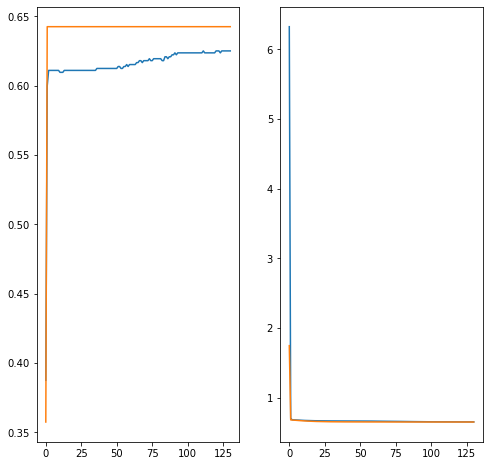

In [98]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(num_of_epochs), acc)
plt.plot(range(num_of_epochs), val_acc)

plt.subplot(1, 2, 2)
plt.plot(range(num_of_epochs), loss)
plt.plot(range(num_of_epochs), val_loss)

In [99]:
np.argmax(acc), np.argmax(val_acc)

(111, 1)

## train complete set

In [100]:
model.fit(X, Y, epochs=num_of_epochs)

Epoch 1/131
28/28 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6285
Epoch 2/131
28/28 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6285
Epoch 3/131
28/28 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6285
Epoch 4/131
28/28 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.6274
Epoch 5/131
28/28 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6285
Epoch 6/131
28/28 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6285
Epoch 7/131
28/28 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6285
Epoch 8/131
28/28 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6285
Epoch 9/131
28/28 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6285
Epoch 10/131
28/28 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.6285
Epoch 11/

## start create submission

In [101]:
prediction = model.predict(test_data)

In [102]:
test_data.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [103]:
preds = np.argmax(prediction, axis=1)

In [104]:
submission = pd.DataFrame({
    'PassengerId': test_data.PassengerId,
    'Survived': preds,
})

submission.sort_values('PassengerId', inplace=True)    
submission.to_csv('submission-keras.csv', index=False)